In [1]:
import os
# Changing the CWD
os.chdir('f:/QA_QC_git/QA_QC_proj/')
os.getcwd()


'f:\\QA_QC_git\\QA_QC_proj'

In [2]:
import pandas as pd
import numpy as np

from qa_qc_lib.readers.gis_reader import Reader_gis_data_for_well
from qa_qc_lib.tests.gis.gis_tests import QA_QC_gis 
from qa_qc_lib.tests.gis.gis_nodes import Nodes_gis_data

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'qa_qc_lib.readers.data_reader'

In [3]:
data_folder = "F:\QA_QC_git\QA_QC_proj\data\gis_data"
data_folder_las ="F:\QA_QC_git\QA_QC_proj\data\gis_data\las"
tops_formation_file_name = "Отбивки пластопересений.xlsx"
mnemonics_file_name = "Мнемоники.xlsx"
las_file_name = "Copy of 2003PL.las"
name_stratum = 'NP4'

In [18]:
GIS_Reader = Reader_gis_data_for_well(name_stratum, data_folder, mnemonics_file_name, tops_formation_file_name)

NameError: name 'os' is not defined

In [8]:
GIS_nodes_for_well = Nodes_gis_data(data_folder_las, las_file_name, GIS_Reader)

In [9]:
GIS_nodes_for_well.check_data()

Проверка данных файла Copy of 2003PL.las
1. Проверка на неоднозначность имен каротажей.
---неоднозначности отсутствуют!

2. Игнорируемые каротажи:
---Для следующих каротажей не удалось определить узел и они будут проигнорированы при тестировании:
{'MIN_GRLOG', 'EFFPOROSITY_SAND', 'PORO_SAND', 'LOB', 'NOB', 'FLAGR', 'ONE-WAYTIME1', 'POROSITY_1', 'KPR1', 'TRUESTRATIGRAPHICTHICKNESS1', 'KPEF1', 'SOIL', 'COPY_GR_N', 'LOG10_PERM', 'FLAG', 'KN1', 'UNCUT_RHOB', 'FLUID', 'KGL1', 'MAX_GRLOG', 'POROSITYRHOBZERO', 'KP1', 'DEPTH_LOG'}
---Уточните файл с мнемониками

3. Наличие каротажей для тестирования.
---В узеле SP каротажи:  ['SP_FLT_NORM']
---В узеле GR каротажи:  ['GR']
---В узеле ГГКп каротажи:  ['RHOB', 'RHOB_CUT_BACK_UP', 'RHOB_CUT_SAND']
---В узеле Neutron каротажи:  ['NEUT_NORM']
---В узеле Vsh каротажи:  ['VSH']
---В узеле IGR каротажи:  ['IGR']
---В узеле Кп_октр каротажи:  ['POROSITY']
---В узеле Кпр_абс каротажи:  ['PERMEABILITY_SAND', 'PERMEABILITY']
---В узеле Литотип каротажи:  [

In [10]:
tests_gis = QA_QC_gis(GIS_nodes_for_well, 'data\gis_data')

In [13]:
first_tests = tests_gis.order_tests[1] 
second_tests = tests_gis.order_tests[2]


     Тест не пройден.
     В некоторых каротажах есть пропуски записи ГИС в интервале пласта 
------------------------------------------------------------------------------------


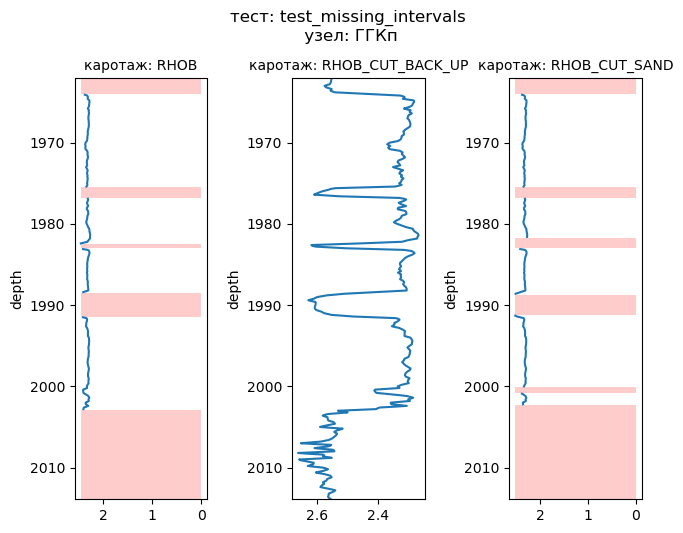


     Тест не пройден.
     Обнаружены перекрытия интервалов записей ГИС
------------------------------------------------------------------------------------


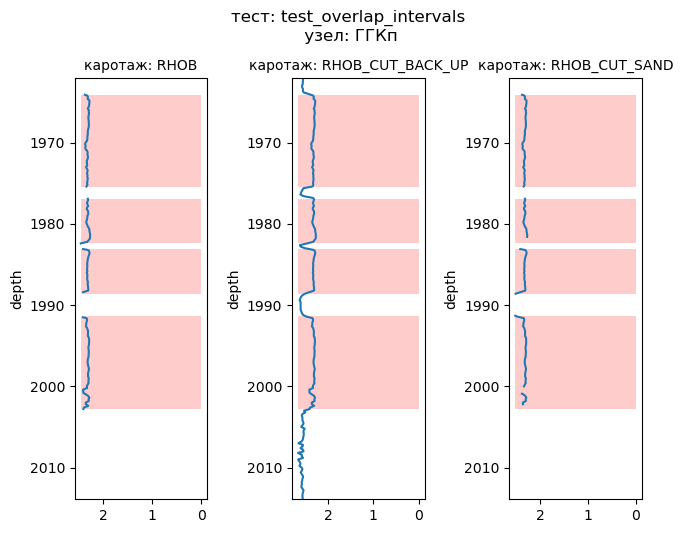


     Тест не пройден.
     В некоторых каротажах есть пропуски записи ГИС в интервале пласта 
------------------------------------------------------------------------------------


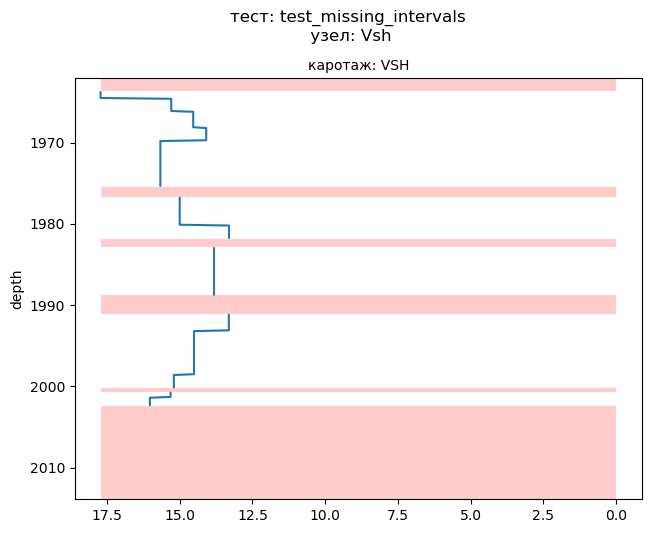


     Тест не пройден.
     В некоторых каротажах есть пропуски записи ГИС в интервале пласта 
------------------------------------------------------------------------------------


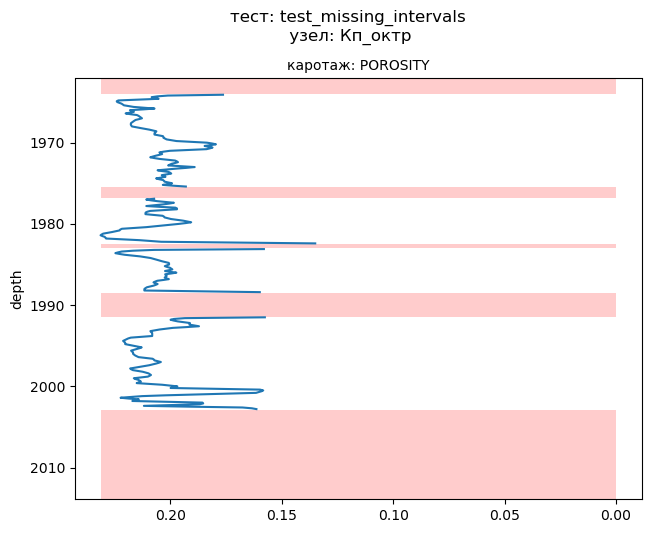


     Тест не пройден.
     В некоторых каротажах есть пропуски записи ГИС в интервале пласта 
------------------------------------------------------------------------------------


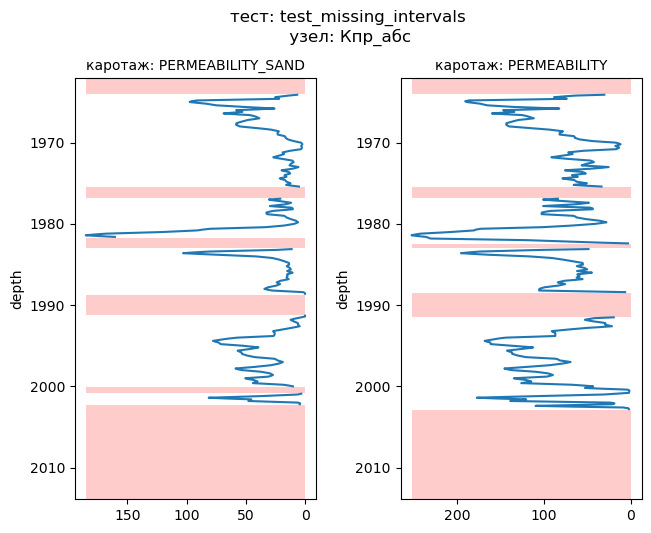


     Тест не пройден.
     Обнаружены перекрытия интервалов записей ГИС
------------------------------------------------------------------------------------


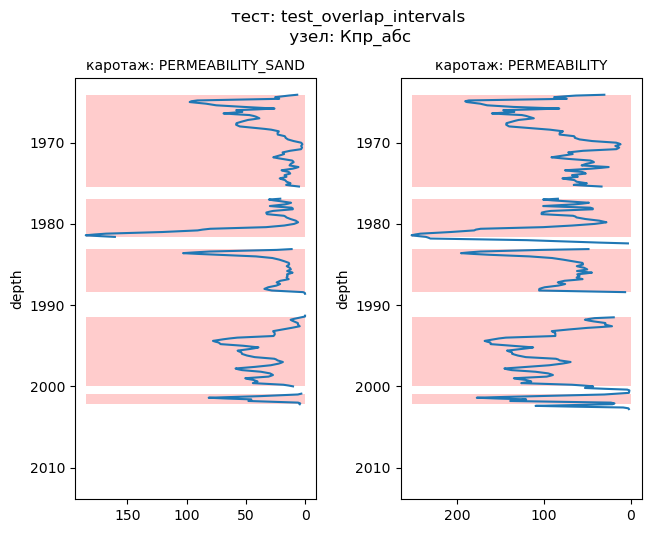


     Тест не пройден.
     Обнаружены перекрытия интервалов записей ГИС
------------------------------------------------------------------------------------


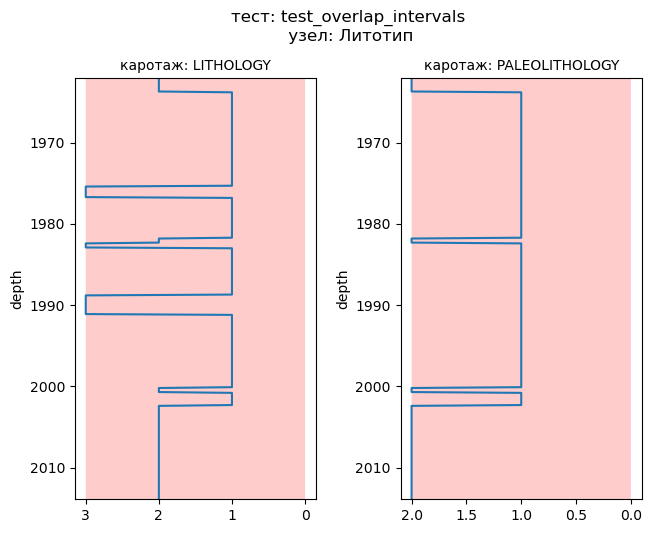


     Тест не пройден.
     Обнаружены перекрытия интервалов записей ГИС
------------------------------------------------------------------------------------


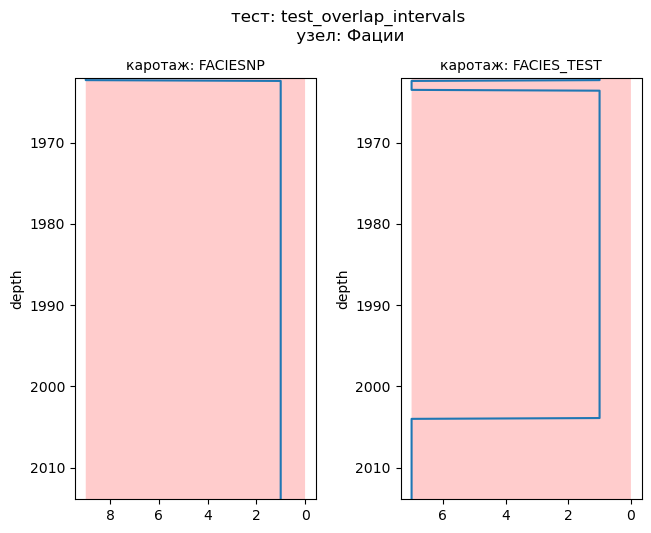

In [14]:
for node_name in tests_gis.nodes_obj.gis_nodes.keys():
    for test in first_tests:
        test_f = getattr(tests_gis, test)
        res_test = test_f(node_name, get_report = False)

        if res_test['data_availability'] and not res_test['result']:
            tests_gis.report_function[test](res_test['specification'], saving = False)

for node_name in tests_gis.nodes_obj.gis_nodes.keys():
    for test in second_tests:
        test_f = getattr(tests_gis, test)
        res_test = test_f(node_name, get_report= False)
        
        if res_test['data_availability'] and not res_test['result']:
            tests_gis.report_function[test](res_test['specification'], saving = False)
